In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

In [2]:
term_structure = pd.read_parquet("../../data/data_agg_v0.parquet")
term_structure.head()

,Date,PX_LAST,PX_VOLUME,PX_LAST_2,PX_VOLUME_2,PX_LAST_3,PX_VOLUME_3,PX_LAST_4,PX_VOLUME_4,PX_LAST_5,...,PX_LAST_20,PX_VOLUME_20,PX_LAST_21,PX_VOLUME_21,PX_LAST_22,PX_VOLUME_22,PX_LAST_23,PX_VOLUME_23,PX_LAST_24,PX_VOLUME_24
0,2023-04-12,87.34,342958.0,86.73,227569.0,85.99,121870.0,85.26,86761.0,84.58,...,77.04,359.0,76.63,125.0,76.22,104.0,75.87,11.0,75.52,NaN
1,2023-04-11,85.61,262666.0,85.17,160501.0,84.54,81421.0,83.91,66394.0,83.27,...,75.92,32.0,75.54,22.0,75.15,551.0,74.82,420.0,74.49,382.0
2,2023-04-10,84.18,140529.0,83.79,69500.0,83.21,39973.0,82.61,34081.0,82.00,...,75.05,13.0,74.69,14.0,74.33,5.0,74.03,1.0,73.73,NaN
3,2023-04-06,85.12,259617.0,84.67,158730.0,84.04,85807.0,83.39,55552.0,82.73,...,75.51,90.0,75.14,31.0,74.77,21.0,74.46,NaN,74.16,NaN
4,2023-04-05,84.99,246479.0,84.62,139082.0,84.04,74685.0,83.42,64434.0,82.77,...,75.62,1577.0,75.25,1032.0,74.88,1205.0,74.57,863.0,74.27,813.0


In [3]:
price_cols = ["PX_LAST"] + [f"PX_LAST_{x}" for x in range(2,13)]
term_structure_clean = term_structure[price_cols]
term_structure_clean.index = term_structure.Date
term_structure_clean = term_structure_clean.dropna()
term_structure_clean.shape

(5148, 12)

In [4]:
monthly_avg = term_structure_clean.groupby(lambda x: (x.year, x.month)).mean()
monthly_avg

,PX_LAST,PX_LAST_2,PX_LAST_3,PX_LAST_4,PX_LAST_5,PX_LAST_6,PX_LAST_7,PX_LAST_8,PX_LAST_9,PX_LAST_10,PX_LAST_11,PX_LAST_12
"(2003, 4)",24.535000,24.565833,24.543333,24.479167,24.392500,24.286667,24.167500,24.035833,23.905833,23.781667,23.664167,23.557500
"(2003, 5)",25.455000,25.217500,25.086000,24.966000,24.838500,24.690000,24.527500,24.351500,24.190000,24.034500,23.886000,23.741000
"(2003, 6)",27.288571,26.958095,26.676190,26.370952,26.048571,25.717143,25.389524,25.079524,24.778571,24.490952,24.212857,23.979048
"(2003, 7)",28.364348,28.191739,27.910435,27.562609,27.175652,26.798696,26.433478,26.076087,25.734783,25.424348,25.150000,24.893913
"(2003, 8)",29.443000,29.199500,28.890500,28.480000,28.036500,27.594500,27.154500,26.722500,26.300500,25.923000,25.633500,25.376000
...,...,...,...,...,...,...,...,...,...,...,...,...
"(2022, 12)",81.341429,81.687143,81.603333,81.448571,81.179524,80.883333,80.542381,80.183333,79.811905,79.452857,79.108571,78.752857
"(2023, 1)",83.997727,84.106818,83.940909,83.619545,83.234091,82.800455,82.351818,81.894545,81.452727,81.010455,80.560000,80.117273
"(2023, 2)",83.537500,83.223000,82.724000,82.299000,81.856500,81.416000,80.971500,80.537000,80.107000,79.665000,79.225000,78.834500
"(2023, 3)",79.206957,78.760435,78.506087,78.198261,77.856522,77.486087,77.130870,76.776087,76.415652,76.055652,75.733478,75.428696


In [5]:
monthly_avg.index

Index([ (2003, 4),  (2003, 5),  (2003, 6),  (2003, 7),  (2003, 8),  (2003, 9),
       (2003, 10), (2003, 11), (2003, 12),  (2004, 1),
       ...
        (2022, 7),  (2022, 8),  (2022, 9), (2022, 10), (2022, 11), (2022, 12),
        (2023, 1),  (2023, 2),  (2023, 3),  (2023, 4)],
      dtype='object', length=241)

In [6]:
monthly_avg.iloc[0].index

Index(['PX_LAST', 'PX_LAST_2', 'PX_LAST_3', 'PX_LAST_4', 'PX_LAST_5',
       'PX_LAST_6', 'PX_LAST_7', 'PX_LAST_8', 'PX_LAST_9', 'PX_LAST_10',
       'PX_LAST_11', 'PX_LAST_12'],
      dtype='object')

In [7]:
monthly_avg.iloc[0].name

(2003, 4)

In [8]:
def animate(i):
    data = monthly_avg.iloc[i]
    x = data.index # assigning 'Time' column to x variable
    y = data.values # assigning 'HRR' column to y variable
    
    plt.cla() # clear axis after plotting individual lines
    plt.plot(x, y, label = monthly_avg.iloc[i].name) # selecting the x and y variables to plot
    plt.xticks(rotation = 45)
    plt.xlabel('Maturities') # label x axis
    plt.ylabel('Price(USD)') # label y axis
    plt.legend()
#     plt.title('HRR Graph')

ani = animation.FuncAnimation(plt.gcf(), animate, interval = 5, frames = 241, repeat = True)
plt.show()

<Figure size 640x480 with 0 Axes>

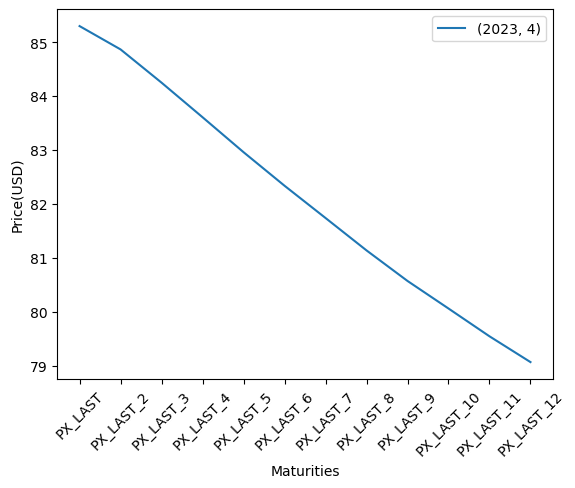

In [9]:
Writer = animation.writers['ffmpeg']
writer = Writer(fps=15, bitrate=1000)
ani.save('term_str_animation.mp4', writer=writer)